# CIS 5450 Homework 2: SQL
## Due: Thursday, October 13rd 2022, 10pm EST 
### Worth 100 points in total

Welcome to Homework 2! By now, you should be familiar with the world of data science and the Pandas library. This assignment focuses on helping you get to grips with a new tool: SQL.

Through this homework, we will be working with SQL (specifically **pandasql**) by exploring a Spotify dataset containing song reviews and statistics. We will also conduct some text analysis of song reviews.

 <!-- We will finish off the homework with some text analysis. -->

We are introducing a lot of new things in this homework, and this is often where students start to get lost. Thus, we **strongly** encourage you to review the slides/material as you work through this assignment. 

**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the pinned FAQ post on Ed for updates! If you have been stuck, chances are other students have also faced similar problems.

## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [1]:
!pip3 install penngrader
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from penngrader.grader import *
import pandas as pd
import datetime as dt
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Three datasets we're using
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_features.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_songs.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_rankings.csv

File ‘spotify_features.csv’ already there; not retrieving.

File ‘spotify_songs.csv’ already there; not retrieving.

File ‘spotify_rankings.csv’ already there; not retrieving.



In [4]:
print(pd.__version__ )

1.3.5


### PennGrader Setup

In [5]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW 
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 15599572 # YOUR PENN-ID GOES HERE AS AN INTEGER #

In [6]:
grader = PennGrader(homework_id = 'CIS_5450_Fall22_HW2', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 15599572

Make sure this correct or we will not be able to store your grade




# Music for everyone!

<br>
<center><img src = "https://upload.wikimedia.org/wikipedia/commons/3/33/Spotify_logo13.png" width= "500" align ="center"/></center>
<br>

We'll be working with a dataset containing Top Tracks on Spotify in 2017, along with their reviews and rankings.

In this homework, we'll be exploring the following attributes of the song data:

*   Song-specific metadata (eg. artist name) 

*   The songs' rankings based on date and listener location

*   Acoustic / musical properties of the song, eg. danceability


We'll be loading this data into various dataframes and querying them. We will primarily be using PandaSQL for these tasks. However, for some of the initial questions, we'll ask you to perform the same operations in Pandas. The purpose of conducting the same tasks in both Pandas and PandaSQL is to help you become more familiar with the similarites and differences of these two tools.

## Part 1: Load & Process our Datasets [9 points total]

Before we get into the data, we first need to load and clean our datasets. 

# Metadata
You'll be working with three CSV files:
- `spotify_features.csv`
- `songs_features.csv`
- `spotify_rankings.csv`

The file `spotify_features.csv` contains musical / acoustic data for each song, obtained via the Spotify API.

The file `songs_features.csv` includes the names, artists, Spotify URLs of the Top Songs of 2017. 

Each row in the file `spotify_rankings.csv` contains a song's ranking on a specific day in a particular region, where regions are sorted alphabetically.

For example, the first 200 rows of `spotify_rankings.csv` represent the ranks of various songs on 1st of January in Argentina. The next 200 rows contain the  rankings of songs during the 2nd of January in Argentina. 

Note that the Spotify dataset may containing missing data, so don't rely on the interval between successive dates as 200 rows. 

Instead, it would be preferable to read all the data and then filter by region & date. This way, you can be sure that you have the required data.


**TODO**:
* Load `spotify_songs.csv` and save the data to a dataframe called `songs_df`.
* Load `spotify_rankings.csv` and save the data to a dataframe called `rankings_df`.
* Load `spotify_features.csv` and save the data to a dataframe called `features_df` without the index column being included.

**Note**: If you see a column called `Unnamed: 0` when loading the data,be sure to drop this column while loading the dataset. This is necessary for one to receive full credit in all the following parts of this homework.

In [7]:
# TODO: Import the datasets to pandas dataframes -- make sure the dataframes are named correctly! 
songs_df = pd.read_csv('spotify_songs.csv')
rankings_df = pd.read_csv('spotify_rankings.csv')
features_df = pd.read_csv('spotify_features.csv')

In [8]:
# view songs_df to make sure the import was successful
songs_df

,id,name,artists,duration_ms,time_signature,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,4,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,4,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,4,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,4,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,4,Your voice is awesome
...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,4,Good strong voice
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,4,good movie sound track
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,4,Good melody. A little different
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,4,Good lyrics...


In [9]:
# view rankings_df to make sure the import was successful
rankings_df

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...,...
3441192,3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [10]:
# view features_df to make sure the import was successful
features_df

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019
4,4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1PSBzsahR2AKwLJgx8ehB,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817
96,96,0QsvXIfqM0zZoerQfsI9l,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797
97,97,7mldq42yDuxiUNn08nvzH,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963
98,98,7i2DJ88J7jQ8K7zqFX2fW,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075


### 1.1 Data Preprocessing
We are now going to clean our dataframes `songs_df` and `rankings_df` by performing the following tasks:       
1) fixing columns        
2) changing datatypes             
3) handling nulls.

First, let us view the first few rows of `songs_df`. You may also call `.info()` and check the cardinality of each column to view the specifics of the dataframe. This is a good first step to take during Exploratory Data Analysis (EDA).

In [11]:
# view info information regarding movies_df
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    object
 1   name            100 non-null    object
 2   artists         100 non-null    object
 3   duration_ms     100 non-null    int64 
 4   time_signature  100 non-null    int64 
 5   reviews         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


#### 1.1.1 Cleaning `songs_df`

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls. With this information, we can now clean our dataframe. 

**TODO**:
* Drop the column `time_signature`.

In [12]:
# TODO: clean songs_df
songs_df = songs_df.drop(['time_signature'], axis=1)

In [13]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_songs', answer = songs_df.head())

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.2 Processing Rankings

`rankings_df` contains a `URL` column that represents the URL of the Spotify track. This URL contains the track ID. We would like to extract the ID corresponding to each song. 

To maintain consistency, begin by sorting this dataframe according to `Date` in ascending order. 

**TODO**:
- Sort the `Date` column in ascending order
- Split the strings in the `URL` column to extract the ID for each song, and save this as a new column called `ID` in `rankings_df`
- Drop the `URL` column

**Example**:
>URL | ID
>--- | ---
> https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTf | 3AEZUABDXNtecAOSC1qTf

After performing these steps, `rankings_df` should have the following schema:
**Final Schema**:
>Position | Track Name | Artist | Streams | Date | Region | ID
>--- | --- | --- |--- |--- |--- |--- |

**Hint**: Note the delimiter within the URL and consult the documentation for the `.split()` function

In [14]:
# TODO: extract ID and drop URL
rankings_df = rankings_df.sort_values('Date')
ID = rankings_df["URL"].str.split("/", n = 4, expand = True)
rankings_df['ID'] = ID[4]
rankings_df = rankings_df.drop(['URL', 'Unnamed: 0'], axis=1)

In [15]:
# 4 points
grader.grade(test_case_id = 'test_rankings_processing', answer = rankings_df.head())

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3 Cleaning `rankings_df`

Now let's clean `rankings_df` and make it usable.

In [16]:
# Examine rankings_df using the .info() function
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   Date        object
 5   Region      object
 6   ID          object
dtypes: int64(2), object(5)
memory usage: 210.0+ MB



**TODO**:
* Drop all rows that have a null value in `rankings_df`
* Convert column `Date` into type `datetime64[ns]`.


In [17]:
#TODO: 
rankings_df = rankings_df.dropna()
rankings_df['Date'] =  pd.to_datetime(rankings_df['Date'])

In [18]:
# 2 points
grader.grade(test_case_id = 'test_cleaning_rankings', answer = [len(rankings_df),rankings_df.head()])

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2 Your Sandbox 

.info() is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own. **This section is not graded**, so for the speedrunners out there feel free to just skip this section (1.2), but we wanted to at least give you a small space to utilize your EDA toolkit to familiarize yourself with all the data you just downloaded.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [19]:
# Your EDA here! Feel free to add more cells54

## Part 2: Exploring the Data with PandasSQL (and Pandas) [62 points total]

Now that you're more familiar with the dataset, we'll now introduce you to SQL language. Specifically, we'll be using **pandasql**: a library that allows users to query Pandas DataFrames using SQL statements.

The typical flow of using pandasql (shortened to **ps**) is as follows:
1. Write a SQL query in the form of a string (Tip: use triple quotes """x""" to write multi-line strings)
2. Run the query using **ps.sqldf(your_query, locals())**

PandaSQL is convenient as it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes `songs_df`, `rankings_df` and `features_df` that you have created above!

Given that SQL is a brand new language, we wanted to give you a chance to directly compare the similarities &differences of Pandas and SQL. 
Thus, for each of the simpler queries, we ask that you **perform the tasks in each question twice: once with Pandas and once with PandaSQL**. 

Each answer (unless specified otherwise) will thus require two dataframes, one dataframe whose name is prefixed with `pd_`, and another dataframe whose name is prefixed with `sql_`. You will submit these two dataframes seperately to the autograder. **We will be reviewing your code to make sure your code for each dataframe is written in the correct language.**


###2.1 Bruno Mars songs


#### 2.1.1 How many Bruno Mars' songs were popular in 2017?

Note: Only Pandas is required for this question.
The dataframe `songs_df` contains all top songs in 2017. We want to know whether Bruno Mars was a part of it (he obviously was) - but which of his songs made it to the top?

**TODO:** Using **pandas**, filter out the songs and reviews from `songs_df` that were by `Bruno Mars`. Then, save this data to a DataFrame called `bruno_df` that has the following schema:

>name | reviews
>--- | ---



In [20]:
# TODO: Use pandas to obtain songs by `Bruno Mars`
bruno_df = songs_df[songs_df['artists'] == 'Bruno Mars']
bruno_df = bruno_df[['name', 'reviews']]

In [21]:
# 2 points
grader.grade(test_case_id = 'test_bruno', answer = bruno_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 How many of Bruno Mars' songs were deemed "good"?
We now want to see which of these songs contained the word "good" in the `reviews` column.

**TODO:** Using **pandasql**, update `bruno_df` so that it only contains songs that have the word 'good' in the `reviews` column.

In [22]:
# TODO: Use pandasql to obtain only "good" songs of bruno mars
good_song_query = """ SELECT * FROM bruno_df WHERE reviews LIKE '%good%' """
bruno_df = ps.sqldf(good_song_query, locals())
bruno_df

,name,reviews
0,24K Magic,Lyrics are very good. Backing sounds nice.


In [23]:
# 2 points
grader.grade(test_case_id = 'test_good_songs_df', answer = bruno_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.2 Finding the hit songs



#### 2.2.1 Extract the total no. of streams
We now want to see what songs formed the top 75% of the year 2017 from `rankings_df`. We can measure the popularity of the songs using the total number of streams the song received.

**TODO**: 
* Find the total number of streams per song and save it into a dataframe called `streams_df`
* Understand the quartile ranges in `streams_df`

**Hint**: you may find it helpful to look up `.describe()` to understand quartiles. It would be helpful to save the necessary quartile value to use in the querying section that follows.




In [24]:
# TODO: Using pandas extract the total number of streams per song from rankings_df
streams_df = rankings_df.groupby(by = 'Track Name').sum().reset_index().drop(['Position'], axis = 1)
streams_df.describe()

,Streams
count,1.859700e+04
mean,9.598901e+06
std,6.903221e+07
min,1.001000e+03
25%,2.133400e+04
50%,1.225160e+05
75%,1.072171e+06
max,2.993989e+09


In [25]:
# 2 points
grader.grade(test_case_id = 'test_pd_describe', answer = len(streams_df))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Top 75% of streams

Now that we've seen the distribution of the streams, we'd like to extract songs with streams within the top 75%, i.e 75% or more streams. For this part, use the quartile values you got via the `.describe()` function.

**TODO**: Using **pandas**, 
Filter out songs from `streams_df` whose stream count is in the top 75%, then save this data as the Pandas dataframe `pd_top_streams`.

In [26]:
# TODO: Using pandas extract the top 75% based on number of streams

top75 = 2.133400e+04
pd_top_streams = streams_df[streams_df['Streams'] >= top75]
pd_top_streams

,Track Name,Streams
1,"""Read All About It, Pt. III""",57025
2,#99,31826
3,#Askip,296862
4,#Biziz - feat. Lil Bege,403591
5,#CTZK,669563
...,...,...
18592,전야 前夜 The Eve,976392
18593,지나갈 테니 Been Through,87456
18594,쩔어 DOPE,209493
18595,피 땀 눈물,68673


In [27]:
# 2 points
grader.grade(test_case_id = 'test_pd_songs', answer = pd_top_streams)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Repeat this process using **pandasql**, and save the data in the variable `sql_top_streams`

In [28]:
# TODO: Using pandasql extract the top 75% based on number of streams
top_query = """
  SELECT * 
  FROM streams_df
  WHERE Streams >= 2.133400e+04
"""

sql_top_streams = ps.sqldf(top_query, locals())
sql_top_streams

,Track Name,Streams
0,"""Read All About It, Pt. III""",57025
1,#99,31826
2,#Askip,296862
3,#Biziz - feat. Lil Bege,403591
4,#CTZK,669563
...,...,...
13943,전야 前夜 The Eve,976392
13944,지나갈 테니 Been Through,87456
13945,쩔어 DOPE,209493
13946,피 땀 눈물,68673


In [29]:
# 2 points
grader.grade(test_case_id = 'test_sql_songs', answer = sql_top_streams)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3 Duration of songs


Now that we know which songs are hits, we'd like to listen to songs that are not too short nor too long.

**TODO**: Using **pandas**, 
Filter out songs from `songs_df` whose duration is between 3 and 5 minutes.

- Create a new column in `songs_df` called "duration_min" that converts the duration in "duration_ms" from milliseconds to minutes
- Extract only songs whose duration is at least 3 minutes and at most 5 minutes. Then, save the output to `ideal_songs_df`.


In [30]:
songs_df['duration_min'] = songs_df['duration_ms']/60000
ideal_songs_df = songs_df[songs_df['duration_min'].between(3, 5)]
ideal_songs_df

,id,name,artists,duration_ms,reviews,duration_min
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.,3.895217
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...,3.813783
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...,3.803333
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...,4.119333
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome,4.810000
...,...,...,...,...,...,...
94,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice,3.988217
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track,3.467550
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...,3.580033


In [31]:
# 2 points
grader.grade(test_case_id = 'test_song_duration', answer = ideal_songs_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.4 Who are the highest ranked artists?

Which artists have been ranked #1 the most times in 2017?

**TODO**: Using the dataframe `rankings_df`, perform the following tasks twice, once using **pandas** and once using **pandasql**:
- Extract the names of artist that have `position` as 1, and store this data in `pd_pos_df`
- Using `pd_pos_df`, find the number of times each artist was ranked #1
- Get the Top 10 artists, i.e. the 10 artists which have been ranked #1 the most times. 

The dataframe `pd_pos_df` should have the following schema:

>Artist | Position
>--- | ---

In [32]:
rankings_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


In [33]:
# TODO: pandas version
pd_pos_df = rankings_df[rankings_df['Position'] == 1]
pd_pos_df = pd_pos_df.groupby('Artist').count().reset_index()
pd_pos_df = pd_pos_df[['Artist', 'Position']]
pd_pos_df = pd_pos_df.sort_values(by = ['Position','Artist'], ascending = [False, True]).iloc[0:10]
pd_pos_df

,Artist,Position
107,Luis Fonsi,4085
54,Ed Sheeran,3780
144,Post Malone,1737
79,J Balvin,1195
114,Maluma,900
130,Natti Natasha,416
16,Bad Bunny,311
167,Taylor Swift,304
47,Danny Ocean,291
29,Camila Cabello,272


In [34]:
# TODO: pandasql version
pos_query = """ 
  SELECT Artist, COUNT(Position) as Position
  FROM rankings_df
  WHERE Position = 1 
  GROUP BY Artist
  ORDER BY COUNT(Position) DESC
  LIMIT 10
"""

sql_pos_df = ps.sqldf(pos_query, locals())
sql_pos_df

,Artist,Position
0,Luis Fonsi,4085
1,Ed Sheeran,3780
2,Post Malone,1737
3,J Balvin,1195
4,Maluma,900
5,Natti Natasha,416
6,Bad Bunny,311
7,Taylor Swift,304
8,Danny Ocean,291
9,Camila Cabello,272


In [35]:
# 6 points
grader.grade(test_case_id = 'test_artist_rank', answer = (pd_pos_df, sql_pos_df, pos_query))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.5 Popular Artists!

Are there artists whose songs are streamed more often than others? Let's find out!

**TODO:**

Perform the following task involving the dataframe `rankings_df` twice, once using **pandas** and once using **pandasql**. Call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

- Consider rows in `rankings_df` that are during Summer 2017 
  - Note: Consider the duration of summer to be from 15th June 2017 to 16th September 2017 (both dates inclusive)
- Find the total number of streams corresponding to each artist, then store this data in a new column called `Number`. 
- Sort this dataframe on the `Number` column so that the most popular artists appear first (i.e. sort according to the `Number` column in descending order).
- Remember to call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

The dataframes `pd_summer_df` and `sql_summer_df` should both have the following schema:

>Artist | Number
>--- | ---



In [36]:
rankings_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


In [37]:
# TODO: pandas
pd_summer_df = rankings_df[rankings_df['Date'].between(pd.datetime(2017, 6, 15), pd.datetime(2017, 9, 16))]
pd_summer_df = pd_summer_df.groupby(['Artist']).sum().reset_index().drop(['Position'], axis = 1).sort_values(by = 'Streams', ascending = False)
pd_summer_df = pd_summer_df.rename(columns = {'Streams': 'Number'})
pd_summer_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,Artist,Number
766,Ed Sheeran,1331033447
584,DJ Khaled,1298364289
1657,Luis Fonsi,1186212514
435,Calvin Harris,1033045563
1183,J Balvin,1021849673
...,...,...
3005,Á Móti Sól,1052
1129,Huntar,1049
2666,The Panas,1032
2535,Stefán Hilmarsson,1022


In [38]:
#TODO: pandasql
summer_query = """
  SELECT Artist, SUM(Streams) as Number
  FROM rankings_df
  WHERE strftime('%Y-%m-%d',Date) 
  BETWEEN '2017-06-15'
  AND  '2017-09-16'
  GROUP BY Artist
  ORDER BY Number DESC
"""

sql_summer_df = ps.sqldf(summer_query, locals())
sql_summer_df

,Artist,Number
0,Ed Sheeran,1331033447
1,DJ Khaled,1298364289
2,Luis Fonsi,1186212514
3,Calvin Harris,1033045563
4,J Balvin,1021849673
...,...,...
3096,Á Móti Sól,1052
3097,Huntar,1049
3098,The Panas,1032
3099,Stefán Hilmarsson,1022


In [39]:
# 7 points
grader.grade(test_case_id = 'test_summer', answer = (summer_query,pd_summer_df,sql_summer_df))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.6 Which songs are danceable but also mellow?

Now let us switch gears and examine `songs_df` and `features_df`. In particular, we want to find the songs with high danceability and low tempo.

**TODO**: Perform the following tasks, once using **pandas** and once using **pandasql**:
- Before performing any operations,  round the `danceability` column to one decimal place, and call the resultant column `r_danceability`. This will allow us to conduct a more general (coarser) analysis of the data.
- Merge `songs_df` and `features_df`, then sort the songs with danceability in *descending* order and tempo in *ascending* order. (When sorting, make sure to use the `r_danceability` column.)
- Call the output dataframe `pd_songs_features_df` or `sql_songs_features_df` based on whether you used pandas or pandasql.


In [40]:
features_df['r_danceability'] = features_df['danceability'].round(1)
features_df

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,r_danceability
0,0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,0.8
1,1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931,0.7
2,2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,0.7
3,3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,0.6
4,4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1PSBzsahR2AKwLJgx8ehB,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817,0.7
96,96,0QsvXIfqM0zZoerQfsI9l,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797,0.5
97,97,7mldq42yDuxiUNn08nvzH,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963,0.7
98,98,7i2DJ88J7jQ8K7zqFX2fW,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075,0.7


In [41]:
songs_df

,id,name,artists,duration_ms,reviews,duration_min
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.,3.895217
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...,3.813783
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...,3.803333
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...,4.119333
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome,4.810000
...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice,3.988217
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track,3.467550
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,Good melody. A little different,2.756450
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...,3.580033


In [42]:
# TODO: pandas
pd_songs_features_df = songs_df.merge(features_df, on = 'id').sort_values(
    by = ['r_danceability', 'tempo'], ascending = [False, True])
pd_songs_features_df

,id,name,artists,duration_ms,reviews,duration_min,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,r_danceability
94,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783,94,0.884,0.346,8.0,-8.228,0.0,0.3510,0.0151,0.000007,0.0871,0.3760,75.016,0.9
42,5bcTCxgc7xVfSaMV3RuVk,Feels,Calvin Harris,223413,Overall quite a nice sound.,3.723550,42,0.893,0.745,11.0,-3.105,0.0,0.0571,0.0642,0.000000,0.0943,0.8720,101.018,0.9
47,6mICuAdrwEjh6Y6lroV2K,Chantaje,Shakira,195840,NICE TUNE WITH SOME NEAT CHORD CHANGES....VERY...,3.264000,47,0.852,0.773,8.0,-2.921,0.0,0.0776,0.1870,0.000030,0.1590,0.9070,102.034,0.9
38,6EpRaXYhGOB3fj4V2uDkM,Strip That Down,Liam Payne,204502,Rich clean vocals. Nice incidental instrumenta...,3.408367,38,0.869,0.485,6.0,-5.595,1.0,0.0545,0.2460,0.000000,0.0765,0.5270,106.028,0.9
91,4c2W3VKsOFoIg2SFaO6DY,Your Song,Rita Ora,180757,"Great music ,Great voice ,arrangement, etc.",3.012617,91,0.855,0.624,1.0,-4.093,1.0,0.0488,0.1580,0.000000,0.0513,0.9620,117.959,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,205947,"Nice melodies, especially in the beginning. Ha...",3.432450,52,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.000010,0.1220,0.1420,199.864,0.5
22,5uCax9HTNlzGybIStD3vD,Say You Won't Let Go,James Arthur,211467,"truely unique, i like it",3.524450,22,0.358,0.557,10.0,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.4940,85.043,0.4
63,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm,Katy Perry,237734,"Like the recording .nice and clear,smooth",3.962233,63,0.448,0.801,0.0,-5.363,1.0,0.1650,0.0733,0.000000,0.1460,0.4620,189.798,0.4
66,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana""",Alessia Cara,175517,Kind of reminds me of new music.,2.925283,66,0.314,0.555,9.0,-9.601,1.0,0.3700,0.1570,0.000108,0.0670,0.1590,179.666,0.3


In [43]:
# 4 points
grader.grade(test_case_id = 'test_danceability_tempo_pd', answer = pd_songs_features_df[['id', 'r_danceability', 'tempo']])

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [44]:
# TODO: pandasql version
song_feature_query = """
  SELECT  songs_df.id, 
          ROUND(features_df.danceability, 1) as r_danceability, 
          features_df.tempo,
          features_df.id
  FROM songs_df 
  LEFT JOIN features_df
  On songs_df.id = features_df.id
  ORDER BY r_danceability DESC, features_df.tempo ASC
"""


sql_song_features_df = ps.sqldf(song_feature_query, locals())
sql_song_features_df

,id,r_danceability,tempo,id
0,2fQrGHiQOvpL9UgPvtYy6,0.9,75.016,2fQrGHiQOvpL9UgPvtYy6
1,5bcTCxgc7xVfSaMV3RuVk,0.9,101.018,5bcTCxgc7xVfSaMV3RuVk
2,6mICuAdrwEjh6Y6lroV2K,0.9,102.034,6mICuAdrwEjh6Y6lroV2K
3,6EpRaXYhGOB3fj4V2uDkM,0.9,106.028,6EpRaXYhGOB3fj4V2uDkM
4,4c2W3VKsOFoIg2SFaO6DY,0.9,117.959,4c2W3VKsOFoIg2SFaO6DY
...,...,...,...,...
95,4pdPtRcBmOSQDlJ3Fk945,0.5,199.864,4pdPtRcBmOSQDlJ3Fk945
96,5uCax9HTNlzGybIStD3vD,0.4,85.043,5uCax9HTNlzGybIStD3vD
97,6520aj0B4FSKGVuKNsOCO,0.4,189.798,6520aj0B4FSKGVuKNsOCO
98,5hYTyyh2odQKphUbMqc5g,0.3,179.666,5hYTyyh2odQKphUbMqc5g


In [45]:
# 4 points
grader.grade(test_case_id = 'test_danceability_tempo_sql', answer = sql_song_features_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.7 Do we like the same songs?

#### 2.7.1 Which regions have the most streams?

**TODO**: 
Perform the following tasks, once using **pandas** and once using **pandasql**:
- Extract rows belonging to the top 2 regions that have the most streams. 
- Store your output in a new dataframe called `pd_top_regions_df` or `sql_top_regions_df` based on whether you used pandas or pandasql. Both of these dataframes should have same schema as `rankings_df`. Sort both these dataframes in ascending order by `Streams`.

Note: Since we want to focus on specific regions, we should disregard rows where the `Region` column has the value `"global"`.

In [46]:
rankings_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


In [47]:
# TODO: pandas
temp = rankings_df.groupby('Region').sum().reset_index().sort_values(by = 'Streams', ascending = False)
pd_top_regions_df = rankings_df[rankings_df['Region'].isin(['global', 'us'])]
pd_top_regions_df

,Position,Track Name,Artist,Streams,Date,Region,ID
3116842,200,Ni**as In Paris,JAY Z,325951,2017-01-01,global,2KpCpk6HjXXLb7nnXoXA5
3116841,199,Secrets,The Weeknd,331233,2017-01-01,global,3DX4Y0egvc0slLcLl31h2
3116840,198,Superstition - Single Version,Stevie Wonder,331376,2017-01-01,global,5lXcSvHRVjQJ3LB2rLKQo
3116839,197,Oh Lord,MiC LOWRY,331792,2017-01-01,global,1sTUEdVO85YU8Ymk2jeAl
3116838,196,White Iverson,Post Malone,332756,2017-01-01,global,6eT7xZZlB2mwyzJ2sUKG6
...,...,...,...,...,...,...,...
845636,15,Pick It Up (feat. A$AP Rocky),Famous Dex,687929,2018-01-09,us,3ncgNpxLoBQ65ABk4djDy
845635,14,River (feat. Ed Sheeran),Eminem,724892,2018-01-09,us,5UEnHoDYpsxlfzWLZIc7L
845634,13,Candy Paint,Post Malone,735421,2018-01-09,us,42CeaId2XNlxugDvyqHfD
845632,11,Codeine Dreaming (feat. Lil Wayne),Kodak Black,839826,2018-01-09,us,4DTpngLjoHj5gFxEZFeD3


In [48]:
#TODO: pandasql
top_regions_query = """
  SELECT * 
  FROM rankings_df 
  WHERE Region IN (
    SELECT Region
    FROM rankings_df
    GROUP BY Region
    ORDER BY SUM(Streams) DESC
    LIMIT 2
  )
"""

sql_top_regions_df = ps.sqldf(top_regions_query, locals())
sql_top_regions_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,200,Ni**as In Paris,JAY Z,325951,2017-01-01 00:00:00.000000,global,2KpCpk6HjXXLb7nnXoXA5
1,199,Secrets,The Weeknd,331233,2017-01-01 00:00:00.000000,global,3DX4Y0egvc0slLcLl31h2
2,198,Superstition - Single Version,Stevie Wonder,331376,2017-01-01 00:00:00.000000,global,5lXcSvHRVjQJ3LB2rLKQo
3,197,Oh Lord,MiC LOWRY,331792,2017-01-01 00:00:00.000000,global,1sTUEdVO85YU8Ymk2jeAl
4,196,White Iverson,Post Malone,332756,2017-01-01 00:00:00.000000,global,6eT7xZZlB2mwyzJ2sUKG6
...,...,...,...,...,...,...,...
147963,15,Pick It Up (feat. A$AP Rocky),Famous Dex,687929,2018-01-09 00:00:00.000000,us,3ncgNpxLoBQ65ABk4djDy
147964,14,River (feat. Ed Sheeran),Eminem,724892,2018-01-09 00:00:00.000000,us,5UEnHoDYpsxlfzWLZIc7L
147965,13,Candy Paint,Post Malone,735421,2018-01-09 00:00:00.000000,us,42CeaId2XNlxugDvyqHfD
147966,11,Codeine Dreaming (feat. Lil Wayne),Kodak Black,839826,2018-01-09 00:00:00.000000,us,4DTpngLjoHj5gFxEZFeD3


In [49]:
# 7 points
grader.grade(test_case_id = 'test_top_regions', answer = (top_regions_query,  pd_top_regions_df.head(1000),  sql_top_regions_df.head(1000), 
                                                          len(pd_top_regions_df), len(sql_top_regions_df)))

You earned 6/7 points.

But, don't worry you can re-submit and we will keep only your latest score.


#### 2.7.2 Do the regions with the most streams like different songs?

**TODO**: Perform the following task, once using **pandas** and once using **pandasql**:
- Find the songs that the two regions (found in 2.7.1) **DO NOT** have in common
- Store the result in a new dataframe called `pd_diff_tracks_df` or `sql_diff_tracks_df` (based on whether you used pandas or pandasql). These two dataframes should both have the following schema:

>ID | Track Name | Artist
>--- | --- | ---

**Hint**: Do we need to join any tables here? If yes, which type of join should we use?

In [50]:
pd_top_regions_df

,Position,Track Name,Artist,Streams,Date,Region,ID
3116842,200,Ni**as In Paris,JAY Z,325951,2017-01-01,global,2KpCpk6HjXXLb7nnXoXA5
3116841,199,Secrets,The Weeknd,331233,2017-01-01,global,3DX4Y0egvc0slLcLl31h2
3116840,198,Superstition - Single Version,Stevie Wonder,331376,2017-01-01,global,5lXcSvHRVjQJ3LB2rLKQo
3116839,197,Oh Lord,MiC LOWRY,331792,2017-01-01,global,1sTUEdVO85YU8Ymk2jeAl
3116838,196,White Iverson,Post Malone,332756,2017-01-01,global,6eT7xZZlB2mwyzJ2sUKG6
...,...,...,...,...,...,...,...
845636,15,Pick It Up (feat. A$AP Rocky),Famous Dex,687929,2018-01-09,us,3ncgNpxLoBQ65ABk4djDy
845635,14,River (feat. Ed Sheeran),Eminem,724892,2018-01-09,us,5UEnHoDYpsxlfzWLZIc7L
845634,13,Candy Paint,Post Malone,735421,2018-01-09,us,42CeaId2XNlxugDvyqHfD
845632,11,Codeine Dreaming (feat. Lil Wayne),Kodak Black,839826,2018-01-09,us,4DTpngLjoHj5gFxEZFeD3


In [51]:
# TODO: pandas
pd_global_songs_df = pd_top_regions_df[pd_top_regions_df['Region'] == 'global'].drop_duplicates(subset=['ID'])
pd_us_songs_df = pd_top_regions_df[pd_top_regions_df['Region'] == 'us'].drop_duplicates(subset=['ID'])
pd_same_songs_df = pd_global_songs_df.merge(pd_us_songs_df, on = 'ID', how = 'inner')
pd_diff_tracks_df = pd_top_regions_df[['ID', 'Track Name', 'Artist']].drop_duplicates(subset=['ID'])
# pd_diff_tracks_df = pd_diff_tracks_df[~pd_diff_tracks_df['ID'].isin(pd_same_songs_df['ID'])]
pd_diff_tracks_df

,ID,Track Name,Artist
3116842,2KpCpk6HjXXLb7nnXoXA5,Ni**as In Paris,JAY Z
3116841,3DX4Y0egvc0slLcLl31h2,Secrets,The Weeknd
3116840,5lXcSvHRVjQJ3LB2rLKQo,Superstition - Single Version,Stevie Wonder
3116839,1sTUEdVO85YU8Ymk2jeAl,Oh Lord,MiC LOWRY
3116838,6eT7xZZlB2mwyzJ2sUKG6,White Iverson,Post Malone
...,...,...,...
845593,66y7x28jXOPrcmu3D5Zjh,A Million Dreams (Reprise),Austyn Johnson
845595,2mfahQ0EaaZWq4cFNg6A1,All On Me,Devin Dawson
3190436,2EzRdhuoPyNJDlep7lnNf,Dembow,Danny Ocean
3190434,6tvQzeCPwOytDlBYCIOY0,Breathe,Jax Jones


In [52]:
#TODO: pandasql
diff_tracks_query = """
  SELECT global.ID, global."Track Name", global.Artist
  FROM pd_global_songs_df global
       LEFT JOIN pd_us_songs_df us
          ON global.ID = us.ID

  UNION ALL

  SELECT us.ID, us."Track Name", us.Artist
  FROM pd_us_songs_df us
       LEFT JOIN pd_global_songs_df global
          ON global.ID = us.ID

  WHERE global.ID IS NULL
  OR us.ID is NULL
"""

sql_diff_tracks_df = ps.sqldf(diff_tracks_query, locals())
sql_diff_tracks_df

,ID,Track Name,Artist
0,2KpCpk6HjXXLb7nnXoXA5,Ni**as In Paris,JAY Z
1,3DX4Y0egvc0slLcLl31h2,Secrets,The Weeknd
2,5lXcSvHRVjQJ3LB2rLKQo,Superstition - Single Version,Stevie Wonder
3,1sTUEdVO85YU8Ymk2jeAl,Oh Lord,MiC LOWRY
4,6eT7xZZlB2mwyzJ2sUKG6,White Iverson,Post Malone
...,...,...,...
2270,1HXy5I3HTWq8OvxCn0z7G,Heaven,Kane Brown
2271,28BEwylPqT4eAmVYbhC3i,Low Life,Soleima
2272,58aMJUJy2lyKld4OR4ch8,God Save Our Young Blood (with Lana Del Rey),BØRNS
2273,1pqptIVmXZoMRQzqDDvQb,Just for Us,Francis and the Lights


In [53]:
# 15 points
grader.grade(test_case_id = 'test_diff_tracks', answer = (diff_tracks_query, pd_diff_tracks_df, sql_diff_tracks_df))

You earned 10/15 points.

But, don't worry you can re-submit and we will keep only your latest score.


### 2.8 New Years Eve Party!

Who doesn't love to dance? Let's find some songs to groove to!

**TODO**: Perform the following tasks using **pandasql** only:

- Find the songs that made it to the charts in December 2017 (2017-12-01 to 2017-12-31) and whose duration is longer than 3 minutes
- Find the artist and the danceability of these songs. Be sure to only include songs with danceability > 0.5.
- Store the result in a new dataframe called `sql_dance_df` that has the following schema:

>Artist | Track Name | danceability
>--- | --- | ---


**Hint**: Think about which data resides in which table!

In [54]:
features_df

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,r_danceability
0,0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,0.8
1,1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931,0.7
2,2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,0.7
3,3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,0.6
4,4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1PSBzsahR2AKwLJgx8ehB,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817,0.7
96,96,0QsvXIfqM0zZoerQfsI9l,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797,0.5
97,97,7mldq42yDuxiUNn08nvzH,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963,0.7
98,98,7i2DJ88J7jQ8K7zqFX2fW,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075,0.7


In [55]:
#TODO: pandasql
dance_query = """
  SELECT distinct name as "Track Name", artists as Artist, danceability
  FROM songs_df 
  LEFT JOIN rankings_df 
  ON songs_df.id = rankings_df.ID
  LEFT JOIN features_df 
  ON songs_df.id = features_df.id
  WHERE duration_ms > 180000
  AND Date BETWEEN '2017-12-01' AND '2017-12-31'
  AND danceability > 0.5

"""

sql_dance_df = ps.sqldf(dance_query, locals())
sql_dance_df

,Track Name,Artist,danceability
0,Shape of You,Ed Sheeran,0.825
1,Despacito - Remix,Luis Fonsi,0.694
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660
3,Something Just Like This,The Chainsmokers,0.617
4,I'm the One,DJ Khaled,0.609
...,...,...,...
80,Friends (with BloodPop®),Justin Bieber,0.744
81,Bank Account,21 Savage,0.884
82,Bad Things (with Camila Cabello),Machine Gun Kelly,0.675
83,Don't Let Me Down,The Chainsmokers,0.542


In [56]:
# 7 points
grader.grade(test_case_id = 'test_dance', answer = (dance_query, sql_dance_df))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 3: Data Visualization [15 points total -- MANUALLY GRADED]

The popularity of songs fluctuates as time progresses. We want to create a graph that illustrates the no. of streams for the most and least popular songs during each month in 2017.

Perform the following tasks:
- Find the song that had the *most* streams on `2017-01-01`
- Find the song that had the *least* streams on `2017-01-01`
- Find the no. of streams that these two songs received on the first day of each month in 2017 (eg. 2017-01-01, 2017-02-01, 2017-03-01 ... 2017-12-01) 

Plot a line graph which shows the trend you found! Make sure you use the ID of the two songs when creating this graph.

**Hint**: This link is a useful resource: https://seaborn.pydata.org/generated/seaborn.lineplot.html

Make sure your line graph has the following features:
1. The X-axis should be labelled "Date", and the Y-axis should be labelled "Streams".
2. There should be markers on the plot to specify the no. of streams each song received ia particular month.
3. The lines corresponding to the two songs should have different colors.

This section will be **manually graded**.


In [57]:
twosongs = rankings_df[rankings_df['Date'] == pd.datetime(2017, 1, 1)] 
most = twosongs.groupby('ID').sum().reset_index().sort_values(by = 'Streams', ascending = False).iloc[0:1]['ID']
print(most)
#5aAx2yezTd8zXrkmtKl66
least = twosongs.groupby('ID').sum().reset_index().sort_values(by = 'Streams', ascending = True).iloc[0:1]['ID']
print(least)
#7qxgfIAuWUY9VHLn35Sqw
most_df = rankings_df[rankings_df['ID'] == '5aAx2yezTd8zXrkmtKl66']
least_df = rankings_df[rankings_df['ID'] == '7qxgfIAuWUY9VHLn35Sqw']

1690    5aAx2yezTd8zXrkmtKl66
Name: ID, dtype: object
2302    7qxgfIAuWUY9VHLn35Sqw
Name: ID, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [58]:
most_streams = most_df.groupby('Date').sum().reset_index()
most_streams = most_streams[most_streams['Date'].isin(['2017-01-01', 
                                                       '2017-02-01', 
                                                       '2017-03-01', 
                                                       '2017-04-01', 
                                                       '2017-05-01', 
                                                       '2017-06-01', 
                                                       '2017-07-01', 
                                                       '2017-08-01', 
                                                       '2017-09-01', 
                                                       '2017-10-01', 
                                                       '2017-11-01', 
                                                       '2017-12-01'])]
                                                     
# most_streams = most_streams['Streams']
# dates = ['2017-01-01','2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', 
#           '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01']
most_streams = most_streams.rename(columns = {'Streams':'5aAx2yezTd8zXrkmtKl66'}).drop('Position', axis = 1)
most_streams

,Date,5aAx2yezTd8zXrkmtKl66
0,2017-01-01,6266206
31,2017-02-01,5697420
59,2017-03-01,4259480
90,2017-04-01,3263163
120,2017-05-01,2179513
148,2017-06-01,1906610
177,2017-07-01,1641376
208,2017-08-01,1348133
239,2017-09-01,1380447
269,2017-10-01,1061926


In [59]:
least_streams = least_df.groupby('Date').sum().reset_index()
least_streams = least_streams[least_streams['Date'].isin(['2017-01-01', 
                                                       '2017-02-01', 
                                                       '2017-03-01', 
                                                       '2017-04-01', 
                                                       '2017-05-01', 
                                                       '2017-06-01', 
                                                       '2017-07-01', 
                                                       '2017-08-01', 
                                                       '2017-09-01', 
                                                       '2017-10-01', 
                                                       '2017-11-01', 
                                                       '2017-12-01'])]
                                                     
least_streams = least_streams.rename(columns = {'Streams':'7qxgfIAuWUY9VHLn35Sqw'}).drop('Position', axis = 1)
least_streams

,Date,7qxgfIAuWUY9VHLn35Sqw
0,2017-01-01,1001
30,2017-02-01,1440
58,2017-03-01,1245
79,2017-04-01,1198
86,2017-07-01,1112


In [60]:
# Prepare a dataset for plot 
plot_df = most_streams.merge(least_streams, on = 'Date', how = 'left')
plot_df

,Date,5aAx2yezTd8zXrkmtKl66,7qxgfIAuWUY9VHLn35Sqw
0,2017-01-01,6266206,1001.0
1,2017-02-01,5697420,1440.0
2,2017-03-01,4259480,1245.0
3,2017-04-01,3263163,1198.0
4,2017-05-01,2179513,NaN
5,2017-06-01,1906610,NaN
6,2017-07-01,1641376,1112.0
7,2017-08-01,1348133,NaN
8,2017-09-01,1380447,NaN
9,2017-10-01,1061926,NaN


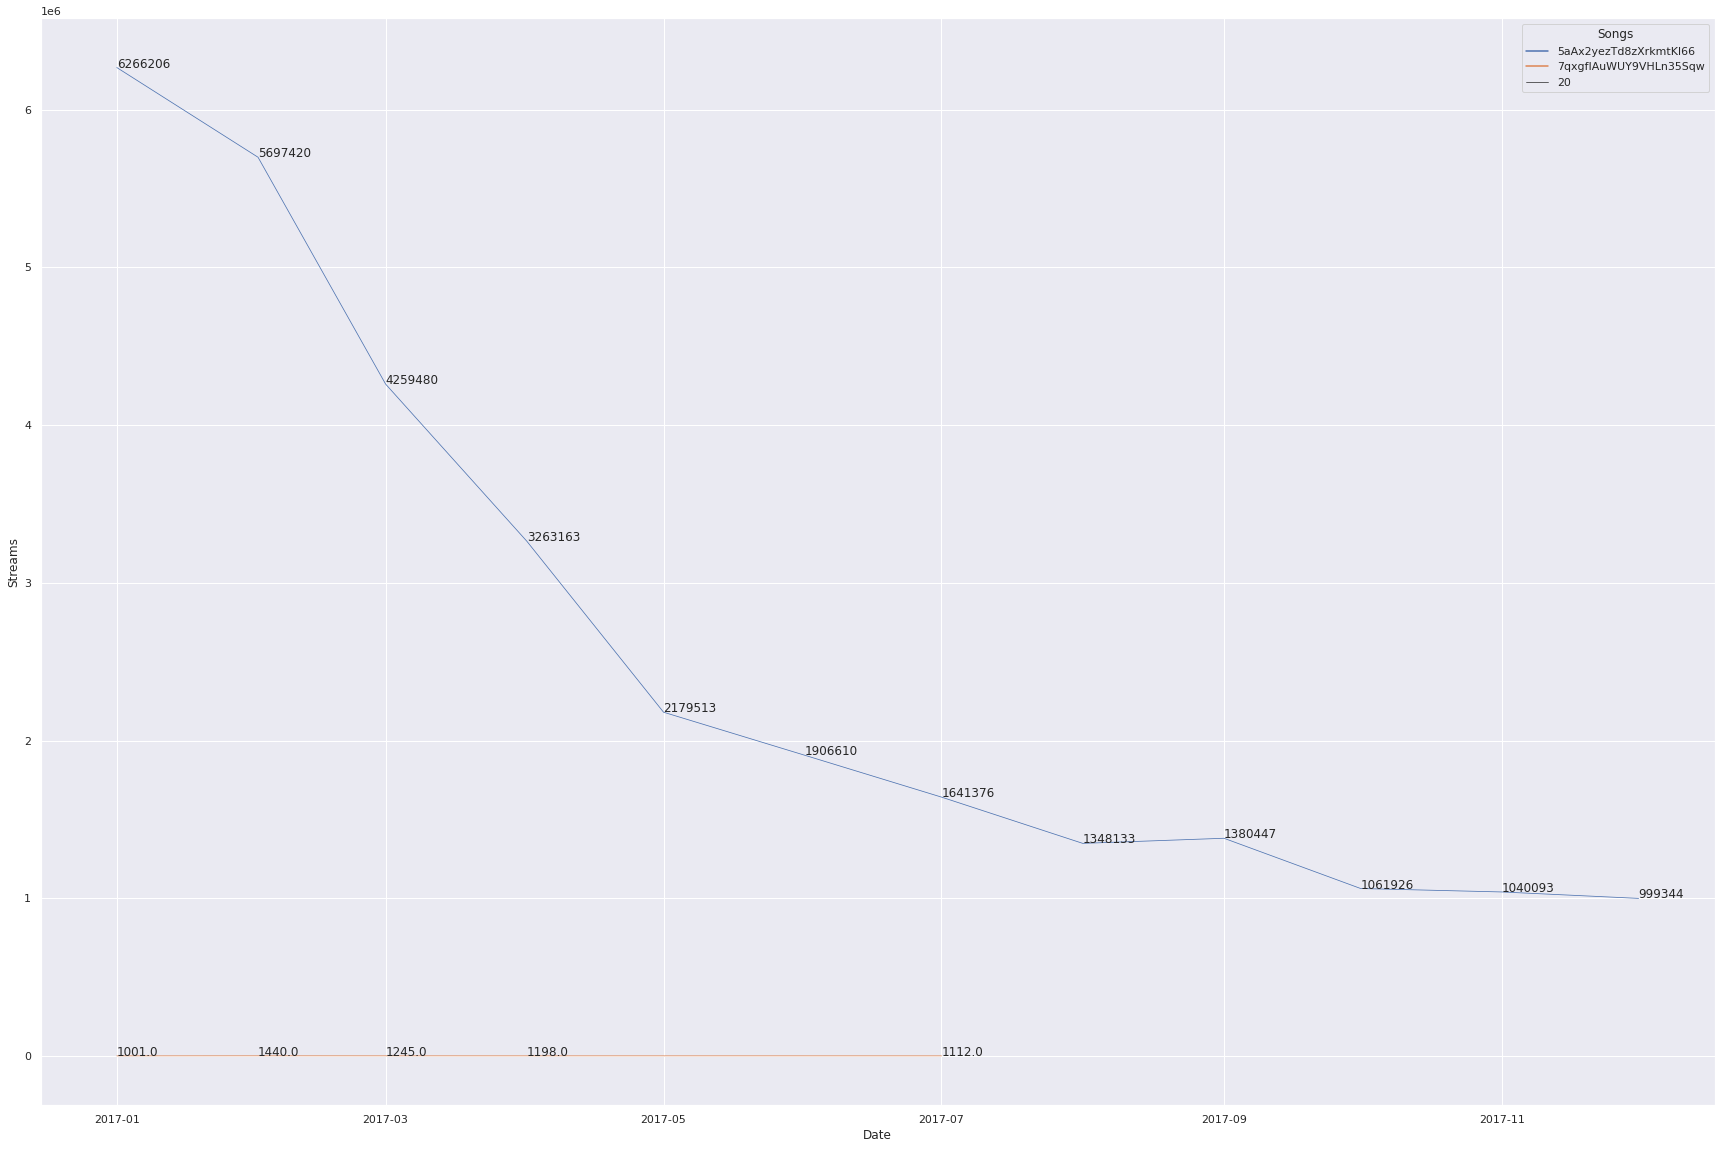

In [70]:
# TODO: Plot a line chart
import seaborn as sns


sns.lineplot(x='Date', y='Streams', hue='Songs', size = 20, 
             data=pd.melt(plot_df, ['Date'], value_name='Streams', var_name='Songs'))
sns.set(rc={'figure.figsize':(30,20)})

for v in plot_df.iterrows():
  plt.text(v[1][0], v[1][1], f'{v[1][1]}')
for v in plot_df.iterrows():
  plt.text(v[1][0], v[1][2], f'{v[1][2]}')

## Part 4: Working with Text Data [14 points]

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting. 

Throughout this section, we will attempt to answer the following question:

**According to the `songs_df` dataframe, what do the reviews for the Top Tracks of 2017 look like?**


###4.1 Tokenizing the text

We are going to split the contents of in the Reviews column into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. Now, this homework would be interminably long if we went into all the details of nltk. Thus, we are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

**TODO:** Perform the following tasks:
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")


In [62]:
import nltk
nltk.__version__

'3.7'

In [63]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# TODO: tokenize and flatten
def tokenize_content(content):
  words = nltk.word_tokenize(content)
  words=[word.lower() for word in words if word.isalpha()]
  words = [w for w in words if w not in stopwords]

  return words

**TODO**: Also perform the following tasks: 
- Extract the `reviews` column of `songs_df` as a list called `reviews`. 
- Apply your `tokenize_content()` function to each item in the list `reviews`. Call the resultant list `top_tokens_list`. 
- Flatten the list `top_tokens_list`, and call the resultant list **top_tokens**. The autograder will be examining the contents of this list.

In [65]:
# TODO: tokenize and flatten
reviews = songs_df['reviews']

top_tokens_list = [tokenize_content(word) for word in reviews]

top_tokens = []

for element in top_tokens_list:
        if type(element) is list:
            for item in element:
                top_tokens.append(item)
        else:
            top_tokens.append(element)


In [66]:
# 2 point
grader.grade(test_case_id = 'test_top_tokens', answer = len(top_tokens))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.2 Most Frequent Words
**TODO**: Now, find the 20 most common words in the list `top_tokens`. Save the result as a list of `(word, count)` tuples, in descending order of `count`.

**Hint**: For this question, you can use `Counter` from the Python `collections` library: https://docs.python.org/2/library/collections.html#counter-objects

In [67]:
from collections import Counter
top_most_common = Counter(top_tokens).most_common(20)
top_most_common

[('good', 35),
 ('nice', 31),
 ('like', 26),
 ('song', 21),
 ('voice', 18),
 ('great', 14),
 ('really', 13),
 ('unique', 12),
 ('lyrics', 12),
 ('sound', 11),
 ('love', 9),
 ('interesting', 9),
 ('vocal', 8),
 ('tune', 8),
 ('vocals', 8),
 ('instrumentation', 7),
 ('melody', 7),
 ('music', 7),
 ('feel', 6),
 ('overall', 6)]

In [68]:
# 2 points
grader.grade(test_case_id = 'test_top_most_common', answer = top_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.3 Word Clouds [10 points]

Before we move on from this dataset, let's visualize our results using a word cloud.

**TODO**: Create a word cloud containing all the words in the list `top_tokens` (created in question 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this. 

*Please make sure your wordcloud has a **white** background.*

We will be going through your notebooks and **manually grading** your word cloud. This is worth 10 points. 

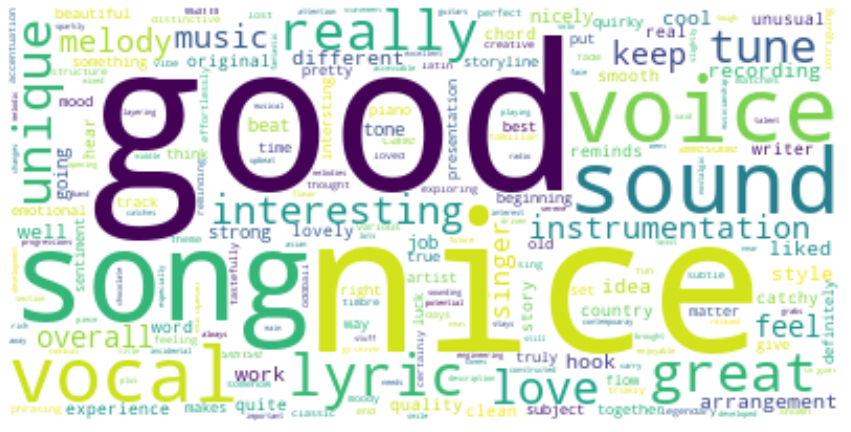

In [69]:
# TODO: make a word cloud for top tokens (MANUALLY GRADED)
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

text = " ".join(title for title in top_tokens)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

plt.show()


# HW Submission

<br>
<center><img src = "https://memegenerator.net/img/instances/73124265/good-job.jpg" width= "500" align ="center"/></center>
<br>

Congratulations on finishing this homework! The good news is that similar to HW1, you basically know your score when you submit to Gradescope. 
However, this time, we will be manually grading your lineplots and wordclouds, so the autograder score is not final! Remember that we will also be checking for plagiarism, so please make sure to cite your sources (if any) by commenting the urls / links you looked at.

Before you submit on Gradescope (you must submit your notebook to receive credit):

1.   Please rerun your notebook on Colab by clicking "Restart and Run-All", and make sure there is nothing wrong with your notebook.
2.   **Double check that you have the correct PennID (all numbers) saved in the autograder**. 
3. Make sure you've run all the PennGrader cells and have received a score.
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py". Please name the `.ipynb` and `.py` files **"homework2.ipynb"** and **"homework2.py"** respectively. Then, upload both the `.py` and `.ipynb` files to Gradescope. 

###Be sure to name your files correctly!!!

**Please let the course staff know ASAP if you have any issues submitting.**